In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [238]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [239]:
# Separate numeric and non-numeric columns
numeric_cols = car_dataset.select_dtypes(include=['number']).columns
non_numeric_cols = car_dataset.select_dtypes(exclude=['number']).columns

In [240]:
# Handling missing values in numeric columns with mean imputation
imputer_numeric = SimpleImputer(strategy='mean')
car_dataset[numeric_cols] = imputer_numeric.fit_transform(car_dataset[numeric_cols])

In [241]:
# Handling missing values in non-numeric columns with the most frequent value imputation
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
car_dataset[non_numeric_cols] = imputer_non_numeric.fit_transform(car_dataset[non_numeric_cols])

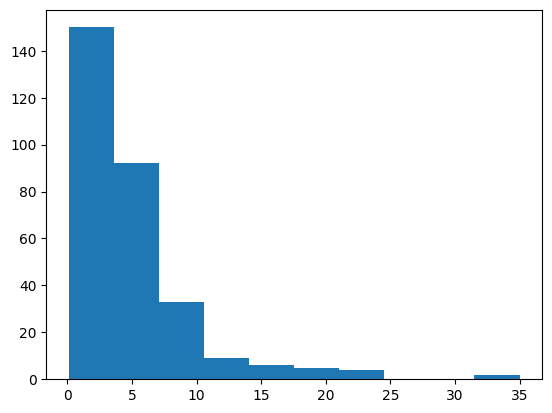

In [242]:
fig=plt.hist(car_dataset.Selling_Price)

Text(0, 0.5, 'Selling_Price')

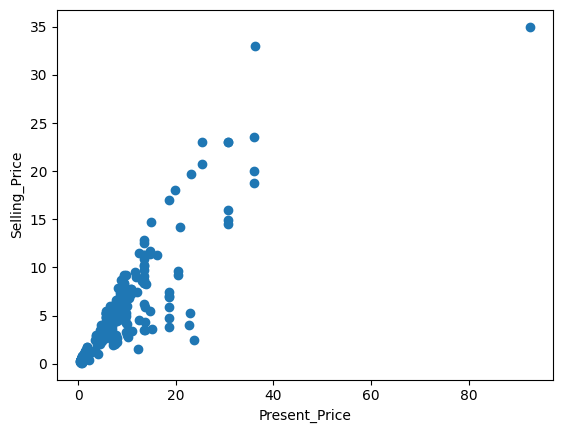

In [243]:
fig=plt.scatter(car_dataset.Present_Price,car_dataset.Selling_Price) 
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')

In [244]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.000000,3.3500,5.590,27000.000000,Petrol,Dealer,Manual,0.0
1,sx4,2013.000000,4.6509,9.540,36861.271812,Diesel,Dealer,Manual,0.0
2,city,2017.000000,4.2200,9.850,6900.000000,Petrol,Dealer,Manual,0.0
3,wagon r,2013.636667,2.8500,4.150,5200.000000,Petrol,Dealer,Manual,0.0
4,city,2014.000000,4.6000,7.631,36861.271812,Diesel,Dealer,Manual,0.0


In [245]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [246]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    float64
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    float64
dtypes: float64(5), object(4)
memory usage: 21.3+ KB


In [247]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [248]:
car_dataset.duplicated().sum()

2

In [249]:
#Understand the correlations between the columns
car_dataset.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20304\3522385763.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_dataset.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.233182,-0.048839,-0.528224,-0.182886
Selling_Price,0.233182,1.000000,0.878837,0.030214,-0.088024
Present_Price,-0.048839,0.878837,1.000000,0.203249,0.008006
Kms_Driven,-0.528224,0.030214,0.203249,1.000000,0.089629
Owner,-0.182886,-0.088024,0.008006,0.089629,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20304\1916076640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_dataset.corr())


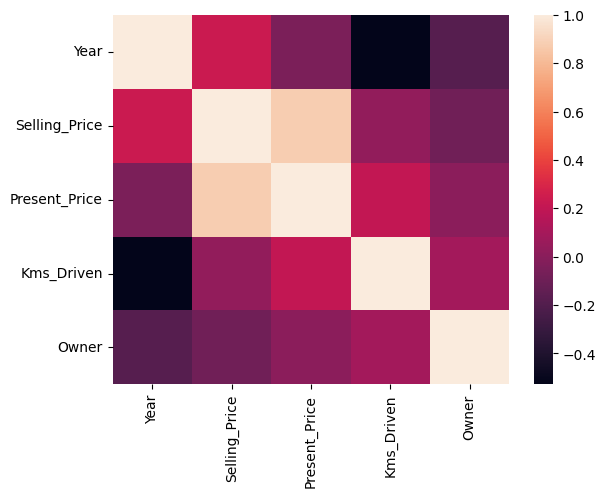

In [250]:
sns.heatmap(car_dataset.corr())
plt.show()

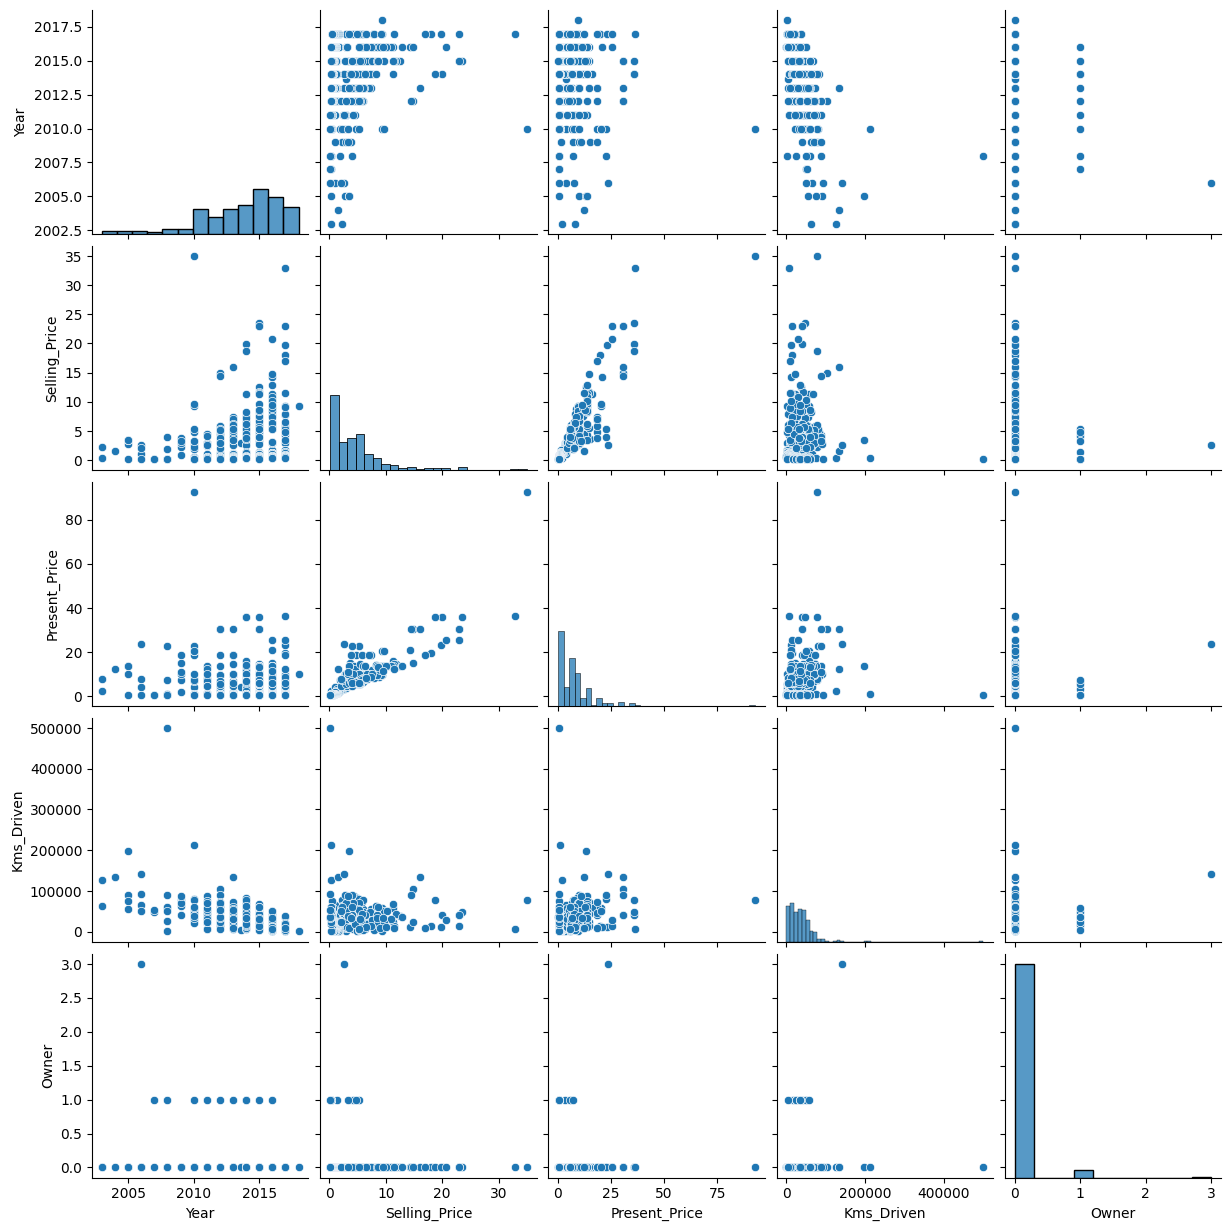

In [251]:
sns.pairplot(car_dataset)
plt.show()

In [252]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [253]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [254]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014.000000,3.3500,5.590,27000.000000,0,0,0,0.0
1,sx4,2013.000000,4.6509,9.540,36861.271812,1,0,0,0.0
2,city,2017.000000,4.2200,9.850,6900.000000,0,0,0,0.0
3,wagon r,2013.636667,2.8500,4.150,5200.000000,0,0,0,0.0
4,city,2014.000000,4.6000,7.631,36861.271812,1,0,0,0.0


In [255]:
#splitting data
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [256]:
print(X)

            Year  Present_Price    Kms_Driven  Fuel_Type  Seller_Type  \
0    2014.000000          5.590  27000.000000          0            0   
1    2013.000000          9.540  36861.271812          1            0   
2    2017.000000          9.850   6900.000000          0            0   
3    2013.636667          4.150   5200.000000          0            0   
4    2014.000000          7.631  36861.271812          1            0   
..           ...            ...           ...        ...          ...   
296  2016.000000         11.600  33988.000000          1            0   
297  2015.000000          5.900  60000.000000          0            0   
298  2009.000000         11.000  87934.000000          0            0   
299  2017.000000         12.500   9000.000000          1            0   
300  2016.000000          5.900   5464.000000          0            0   

     Transmission  Owner  
0               0    0.0  
1               0    0.0  
2               0    0.0  
3              

In [257]:
print(Y)

0       3.3500
1       4.6509
2       4.2200
3       2.8500
4       4.6000
        ...   
296     9.5000
297     4.0000
298     3.3500
299    11.5000
300     5.3000
Name: Selling_Price, Length: 301, dtype: float64


In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [259]:
# loading the linear regression model from sklearn
lin_reg_model = LinearRegression()

In [260]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [261]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [262]:
# R squared Error (Performance)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8376550933614287


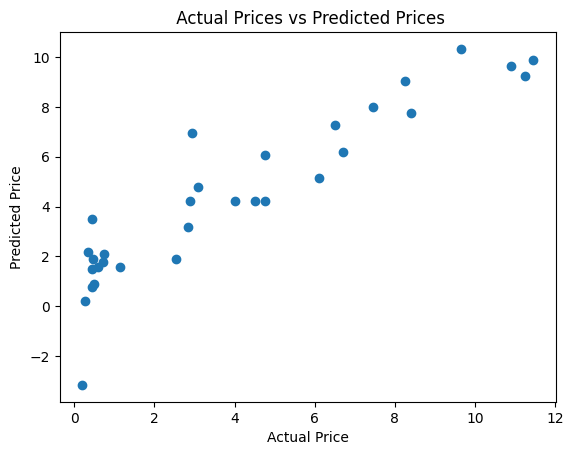

In [263]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [264]:
# loading the linear regression model
lass_reg_model = Lasso()

In [265]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [266]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [267]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8722447417735671


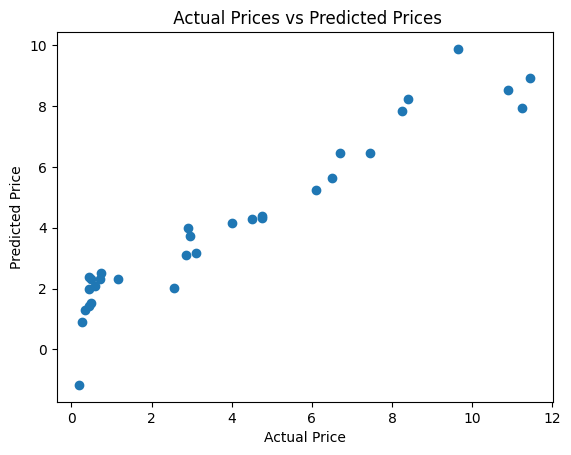

In [268]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [269]:
#With R2
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R2 Error : ", error_score)

R2 Error :  0.8722447417735671


In [270]:
MAE = mean_absolute_error(Y_test, test_data_prediction)
RMSE = np.sqrt(MAE)

print("Mean Absolute Error (MAE):", MAE)
print("Root Mean Squared Error (RMSE):", RMSE)

Mean Absolute Error (MAE): 1.0369993492372744
Root Mean Squared Error (RMSE): 1.0183316499241661


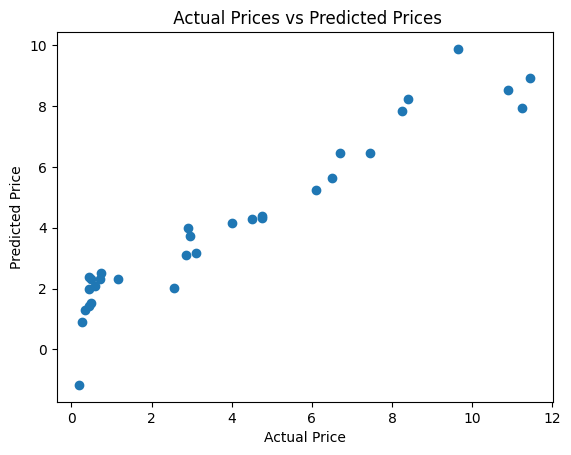

In [271]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()